<a href="https://colab.research.google.com/github/SunilKumar2501/DSMP-Tasks/blob/main/Pandas_casestudy_IMDB_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/IMDB Dataset.csv")
df = df.head(10000)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [140]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [141]:
df.info() #check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [142]:
df.duplicated().sum()

17

In [143]:
df = df.drop_duplicates()

# Data Cleaning

In [144]:
#lower case
df.loc[:,"review"] = df["review"].str.lower()

In [145]:
df["review"][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [146]:
#remove whitespaces
df.loc[:,"review"] = df["review"].str.strip()

In [147]:
#remove html tags
#1st
import re
def remove_html(data):
    data = re.sub(r'<.*?>','',data)
    return data
df["review"].apply(remove_html)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
9995,"fun, entertaining movie about wwii german spy ..."
9996,give me a break. how can anyone say that this ...
9997,this movie is a bad movie. but after watching ...
9998,this is a movie that was probably made to ente...


In [148]:
#2nd way
df.loc[:,"review"] = df["review"].str.replace(r'<.*?>','',regex = True)

In [149]:
# remove URL
def remove_url(data):
    data=re.sub(r"https?://\S+|www\.\S+",'',data)
    return data

In [150]:
# code to remove a URL
df.loc[:,'review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'',regex = True)

In [151]:
#expanding abbvr

#expand

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)

    return data

In [152]:
df.loc[:,"review"] = df["review"].apply(remove_abb)

In [153]:
df["review"]

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there is a family where a little boy...
4,"petter mattei's ""love in the time of money"" is..."
...,...
9995,"fun, entertaining movie about wwii german spy ..."
9996,give me a break. how can anyone say that this ...
9997,this movie is a bad movie. but after watching ...
9998,this is a movie that was probably made to ente...


In [154]:
#spelling correction
from textblob import TextBlob
def spelling_correc(text):
    return TextBlob(text).correct().string

In [155]:
# df.loc[:50,"review"].apply(spelling_correc)

In [156]:
#Punchtuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [157]:
def remove_puctuation(text):

    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')

    return text


In [158]:
df["review"] = df["review"].apply(remove_puctuation)

<ipython-input-158-7be57181fa40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(remove_puctuation)


In [159]:
#remove special characters
df["review"] = df["review"].str.replace(r"[^\w\s]","",regex = True)

<ipython-input-159-113bcf783de4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].str.replace(r"[^\w\s]","",regex = True)


# Preprocessing

In [160]:
#tokenize
from nltk.tokenize import word_tokenize

In [161]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

# df["review"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
df["tokenized_review"] = df["review"].apply(word_tokenize)

<ipython-input-162-d4e7914f5307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized_review"] = df["review"].apply(word_tokenize)


In [163]:
#stop word removal
from nltk.corpus import stopwords

In [164]:
def remove_stopwords(text):

    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)

    return L

In [165]:
df["tokenized_review2"] = df["tokenized_review"].apply(remove_stopwords)

<ipython-input-165-43bfb1e0169f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tokenized_review2"] = df["tokenized_review"].apply(remove_stopwords)


In [166]:
df.head()

,review,sentiment,tokenized_review,tokenized_review2
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."


# EDA

In [167]:
df["review"] = df["tokenized_review2"].apply(lambda x: " ".join(x))

<ipython-input-167-999a1b67d5e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["tokenized_review2"].apply(lambda x: " ".join(x))


In [168]:
df

,review,sentiment,tokenized_review,tokenized_review2
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."
...,...,...,...,...
9995,fun entertaining movie wwii german spy julie a...,positive,"[fun, entertaining, movie, about, wwii, german...","[fun, entertaining, movie, wwii, german, spy, ..."
9996,give break anyone say good hockey movie know m...,negative,"[give, me, a, break, how, can, anyone, say, th...","[give, break, anyone, say, good, hockey, movie..."
9997,movie bad movie watching endless series bad ho...,negative,"[this, movie, is, a, bad, movie, but, after, w...","[movie, bad, movie, watching, endless, series,..."
9998,movie probably made entertain middle school ea...,negative,"[this, is, a, movie, that, was, probably, made...","[movie, probably, made, entertain, middle, sch..."


In [169]:
#feature
df["char_length"] = df["review"].str.len()

<ipython-input-169-ca6b567ccd7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_length"] = df["review"].str.len()


In [170]:
df["word_length"] = df["tokenized_review2"].apply(len)

<ipython-input-170-595c8d91b38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_length"] = df["tokenized_review2"].apply(len)


<Axes: xlabel='char_length', ylabel='Count'>

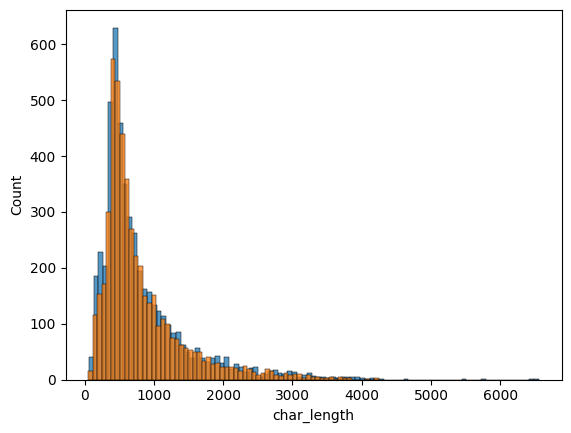

In [171]:
import seaborn as sns
sns.histplot(df[df["sentiment"] == "positive"]["char_length"])
sns.histplot(df[df["sentiment"] == "negative"]["char_length"])

<Axes: xlabel='word_length', ylabel='Count'>

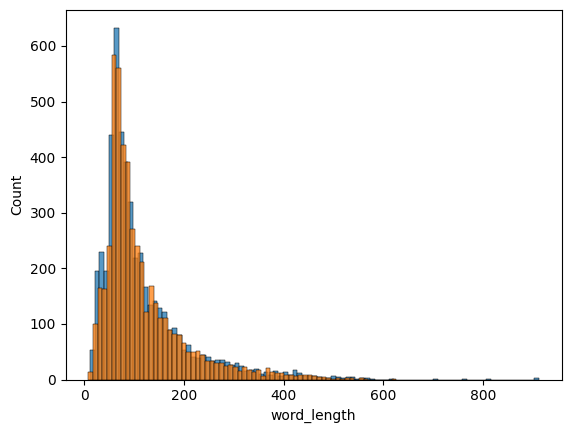

In [172]:
sns.histplot(df[df["sentiment"] == "positive"]["word_length"])
sns.histplot(df[df["sentiment"] == "negative"]["word_length"])

In [173]:
# common unigrams
from nltk import ngrams
pd.Series(ngrams(df["tokenized_review2"].sum(),2)).value_counts()

,count
"(I, would)",492
"(ever, seen)",459
"(special, effects)",438
"(I, seen)",429
"(even, though)",372
...,...
"(solve, mysterythis)",1
"(mysterythis, early)",1
"(70s, devilthemed)",1
"(devilthemed, horror)",1


In [174]:
pos = df[df["sentiment"] == "positive"]["tokenized_review2"]
neg = df[df["sentiment"] == "negative"]["tokenized_review2"]
print(pd.Series(ngrams(pos.sum(),3)).value_counts())
print(pd.Series(ngrams(neg.sum(),3)).value_counts())

(I, ever, seen)                  61
(would, love, see)               30
(world, war, ii)                 28
(new, york, city)                27
(films, I, seen)                 23
                                 ..
(anythingenjoy, 10, 10)           1
(find, anythingenjoy, 10)         1
(really, find, anythingenjoy)     1
(itwelli, really, find)           1
(puppets, pure, delight)          1
Name: count, Length: 582039, dtype: int64
(I, ever, seen)                  108
(worst, movie, ever)              68
(one, worst, movies)              55
(worst, movies, ever)             40
(movie, ever, seen)               39
                                ... 
(though, prevailing, opinion)      1
(even, though, prevailing)         1
(liking, even, though)             1
(admit, liking, even)              1
(failed, movie, good)              1
Name: count, Length: 571651, dtype: int64


In [175]:
pd.Series(ngrams(df["tokenized_review2"].sum(),3)).value_counts()

,count
"(I, ever, seen)",169
"(worst, movie, ever)",69
"(I, would, like)",56
"(movie, ever, seen)",56
"(one, worst, movies)",55
...,...
"(teenagers, horrendous, watch)",1
"(horrendous, watch, gossett)",1
"(watch, gossett, jr)",1
"(gossett, jr, made)",1


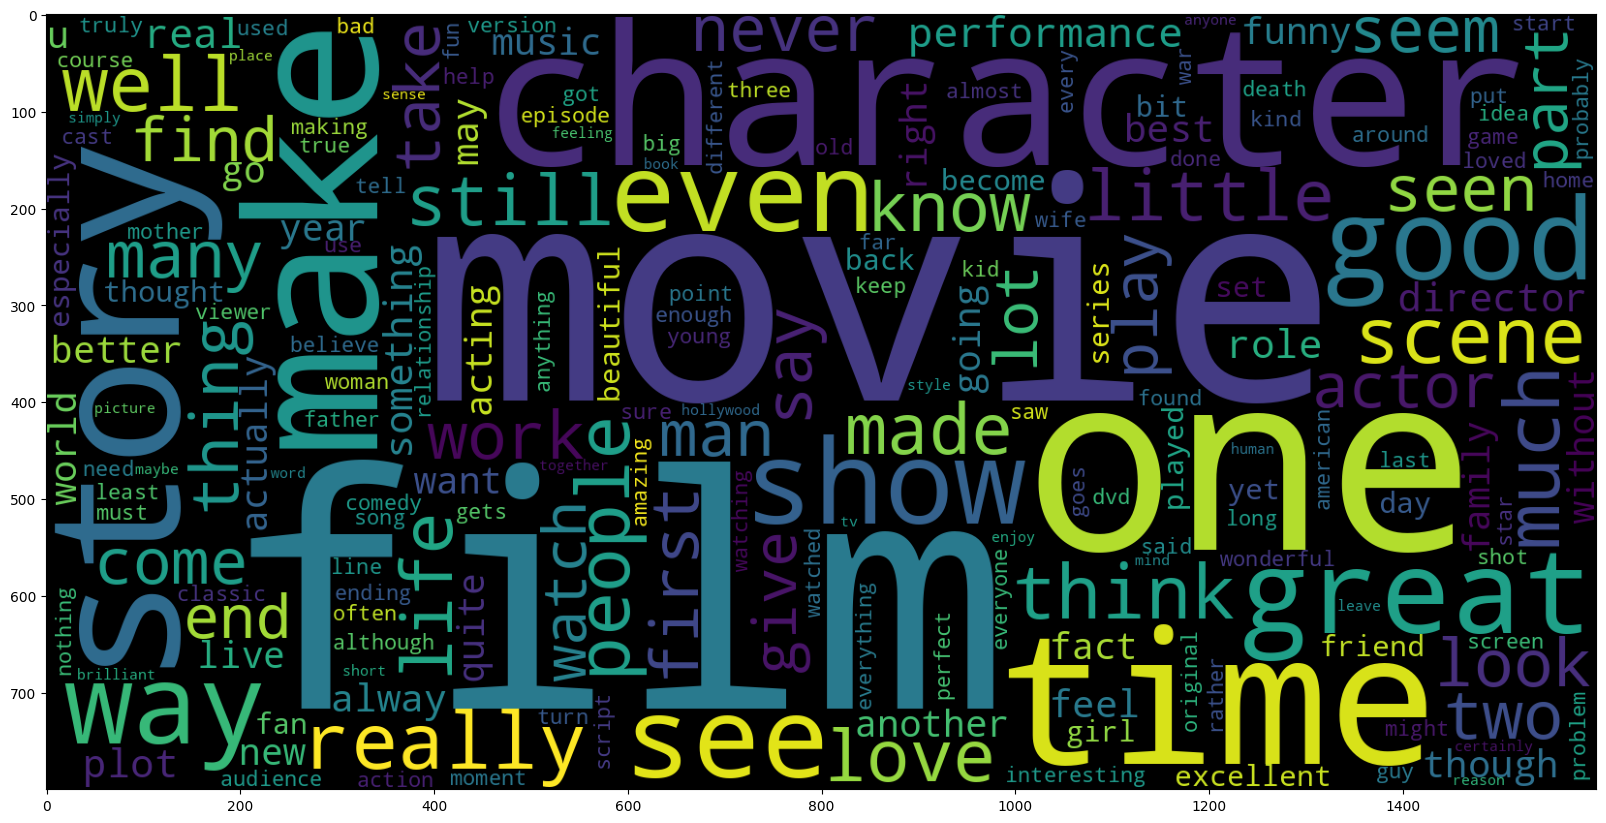

In [176]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

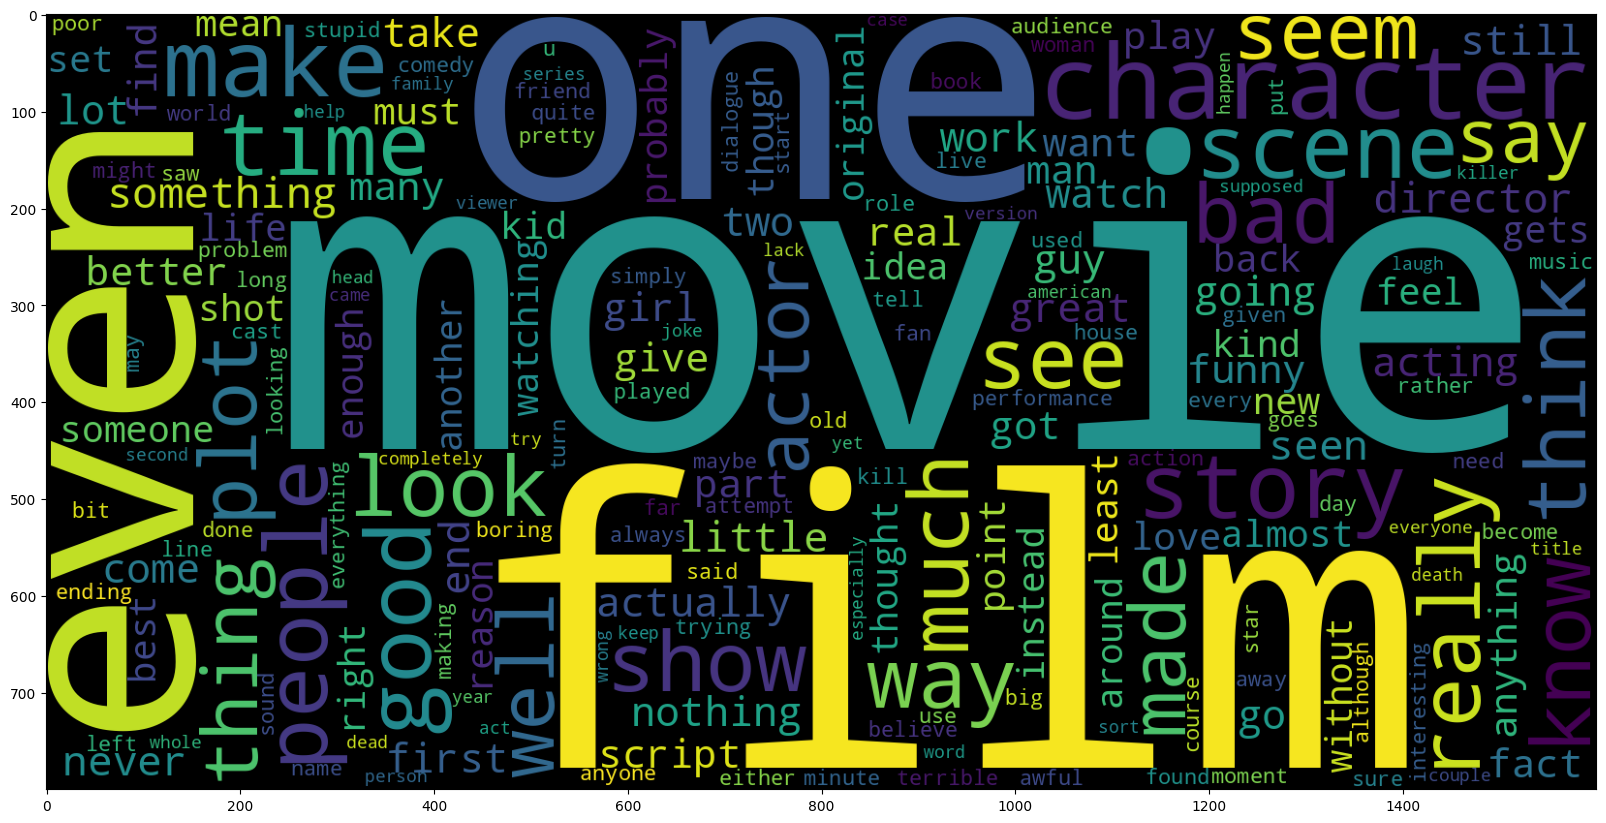

In [177]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

# Vectorization

In [178]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,1))
bag_of_words = count_vectorizer.fit_transform(df['review'])
# print(bag_of_words)
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [180]:
bag_of_words

,10,100,1000,1010,11,110,12,13,13th,14,...,york,you,young,younger,youth,youthful,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

<Axes: >

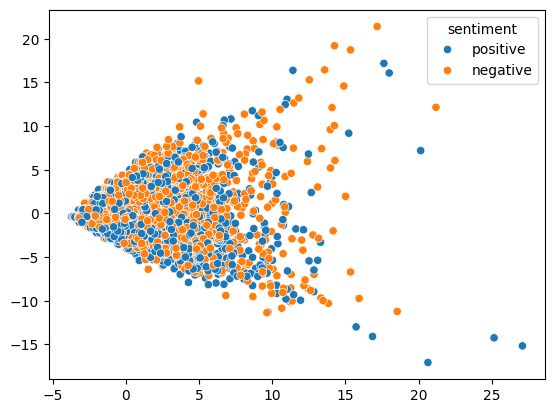

In [182]:
sns.scatterplot(x = pca_result[:,0],y = pca_result[:,1],hue=df['sentiment'])